# 式変形

In [37]:
from IPython.display import display # display(code)で数式をキレイに表示可能
init_printing(use_latex=True)

## 簡単化

In [2]:
from sympy import *
x,y = symbols('x y')
simplify(3*x+4*x+2*y)

7*x + 2*y

In [3]:
exp1=3*sin(x)**3-sin(x)*cos(x)**2
simplify(exp1)

4*sin(x)**3 - sin(x)

## 展開(expand)

In [4]:
expand((x+y)**2)

x**2 + 2*x*y + y**2

## 因数分解(factor)

In [5]:
factor(4*x**2-6*x*y+2*y**2)

2*(x - y)*(2*x - y)

## 約分・通分(normal)

In [6]:
simplify((x+y)/(x**2-3*x*y-4*y**2))

1/(x - 4*y)

In [7]:
together(1/x+1/y)

(x + y)/(x*y)

## 項を変数でまとめる(collect)

In [9]:
a,b,c = symbols('a b c')
collect(4*a*x**2-3*y**2/x+6*b*x*y+3*c*y+2*y**2,y)

4*a*x**2 + y**2*(2 - 3/x) + y*(6*b*x + 3*c)

## 分母、分子(denom, numer)

In [15]:
a,b,c, x = symbols('a b c x')
frac = (1+x)**2/(a*(x-1)+b*(x+3))
n,d = fraction(frac)
display(n)
display(d)

## 係数(coeff)

In [17]:
eq = a+x+b*x+c*x**2
display(eq)
eq.coeff(x)

In [18]:
eq.as_coefficients_dict()

In [19]:
eq0 = Poly(eq, x)
coeffs = eq0.coeffs()
print(coeffs[::-1])

[a, b + 1, c]


## 課題

### 因数分解

1.

In [20]:
x = symbols('x')
factor(x**3 - 8)

2.

In [22]:
x,a,b,c = symbols('x a b c')
factor(a*b*c - a*b*x - a*c*x + a*x**2 + b*c*x - b*x**2 - c*x**2 + x**3)

### 部分分数

1. 

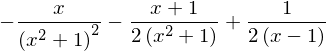

In [26]:
x = symbols('x')
apart((x+1)/((x-1)*(x**2+1)**2))

2.

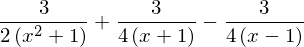

In [29]:
x,a,b,c = symbols('x a b c')
apart(3/(1-x**4))

$$
a=\frac{3}{2}, b=\frac{3}{4}, c=-\frac{3}{4}
$$

### 分母の有理化

In [31]:
radsimp((8/(3-sqrt(5))) - (2/(2+sqrt(5))))

### 複合問題

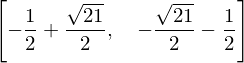

In [32]:
k,x = symbols('k x')
eq=x**2 +2*k*x+5-k
sol = solve(eq,x)
solve(sol[0]-sol[1],k)

### 数式処理問題の典型例:2次関数の頂点 

In [39]:
a,b,x = symbols('a b x')

f = a*x**2 - b*x - a + b
display(f)

In [53]:
b_s = solve(f.subs({x:-2})-6,b)[0] # f にx=-2, y=6を代入。bについて解く
display(b_s)

In [51]:
f_diff = solve(diff(f,x),x)[0] # fをxで微分して、xについて解く
display(f_diff)

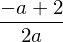

In [56]:
x0 = f_diff.subs({b:b_s}) # x=0のとき
display(x0)

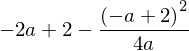

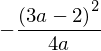

In [61]:
y0 = f.subs({x:x0, b:b_s})
display(y0)
display(factor(y0))

#### 課題1

In [69]:
ans1 = expand((y0+2)*(-4*a))
display(ans1)

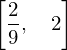

In [74]:
ans2 = solve(ans1,a)
display(ans2)

In [75]:
aa = min(ans2)
display(aa)

In [84]:
ans3 = x0.subs({a:aa})
display(ans3)

In [101]:
bb = b_s
ans4 = f.subs({b:bb}).subs({a:aa})
ans5 = solve(ans4,x)
display(ans5)

[1, 7]


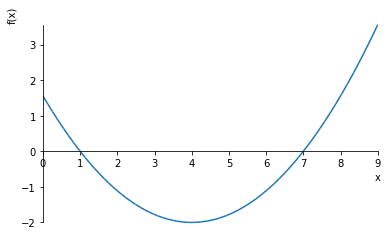

In [102]:
%matplotlib inline
plot(ans4,(x,0,9))

In [103]:
print(ans4.subs({x:4}))
print(ans4.subs({x:9}))

-2
32/9


####  課題2

In [106]:
a,b,x = symbols('a b x')

P = x*(x+3)*(2*x-3)

In [108]:
ans2_1 = expand(P.subs({x:a+1}))
display(ans2_1)

In [111]:
ans2_2 = expand(ans2_1 - P.subs({x:a}))
display(ans2_2/2)

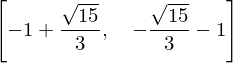

In [114]:
ans2_3 = solve(ans2_2, a)
display(ans2_3)

### 式フォローのデフォルト

In [124]:
ex1 = (x-3)**4 # (1)式
ex2 = x**4-12*x**3+54*x**2-108*x+81 # (2)式

expand(ex1-ex2) # (1) == (2)?

## assumeの具体例 : 無限積分

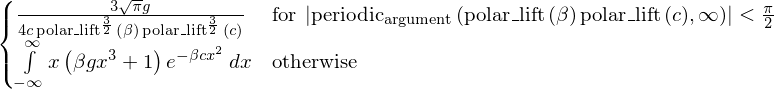

In [127]:
init_printing()


x,beta,c,g = symbols('x beta c g')
f1 = x*exp(-beta*c*x**2)*(1+beta*g*x**3)

display(f1)
display(integrate(f1,(x,-oo,oo)))